# This Notebook is to predict bankruptcy of some industries based on the informations provided.

In [1]:
# Import libraries here
import gzip
import json
import pickle

import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


In [2]:
#Read data into dataframe df
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
#Shape of the dataframe, numbers of rows and columns
print("df shape:", df.shape)


df shape: (6819, 96)


In [4]:
##columns with missing input
nans_by_col = df.isna().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
dtype: int64

Text(0.5, 1.0, 'Class Balance')

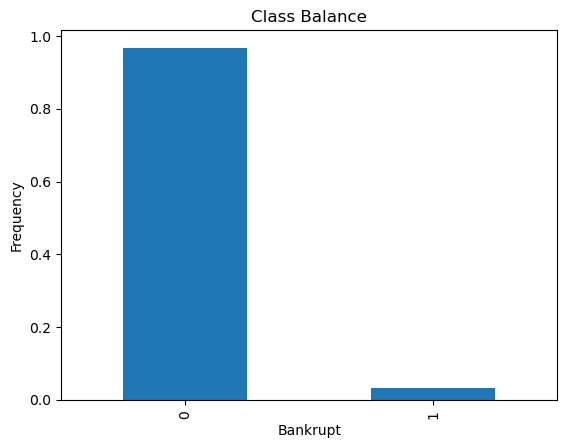

In [5]:
# Plot class balance of the target column
df["Bankrupt?"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Bankrupt")
plt.ylabel("Frequency")
plt.title("Class Balance")

In [6]:
#
target = "Bankrupt?"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [7]:
#Train test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [8]:

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


Text(0.5, 1.0, 'Class Balance')

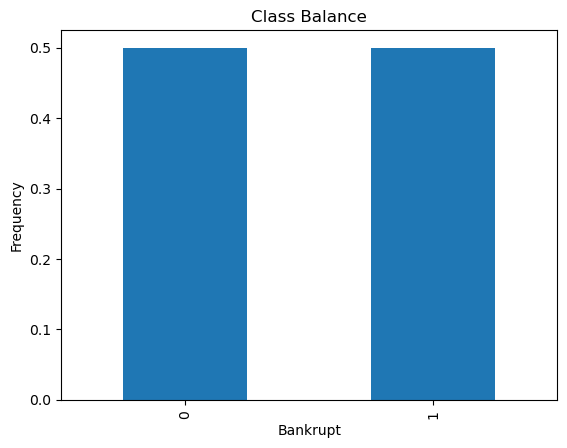

In [9]:
# Class balance plot after sampling
y_train_over.value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Bankrupt")
plt.ylabel("Frequency")
plt.title("Class Balance")

In [10]:
# Train another model with the most important features and best estimator parameters
list_features =  [' Net Income to Total Assets',
                  ' Borrowing dependency',
                 ' Total income/Total expense',
                 ' Persistent EPS in the Last Four Seasons',
                 ' ROA(A) before interest and % after tax',
                 ' Retained Earnings to Total Assets',
                 ' Liability to Equity',
                 ' Total debt/Total net worth',
                 ' Equity to Liability',
                 ' Pre-tax net Interest Rate']



In [11]:
#We use only first 10 important features to train the model
X_train_select = X_train_over[list_features]
X_test_select = X_test[list_features]

print("X_train shape:", X_train_select.shape)
print("y_train shape:", y_train_over.shape)
print("X_test shape:", X_test_select.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10572, 10)
y_train shape: (10572,)
X_test shape: (1364, 10)
y_test shape: (1364,)


In [12]:
#initializing the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_select, y_train_over)

RandomForestClassifier(random_state=42)

In [13]:
#parameter choice
params = {
    "n_estimators":range(1,50,5),
    "max_depth":(2,5)
}

In [14]:
#Bluid model
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)
model.fit(X_train_select, y_train_over)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': (2, 5), 'n_estimators': range(1, 50, 5)},
             verbose=1)

In [15]:
cv_scores = cross_val_score(clf,X_train_select, y_train_over,cv=5,n_jobs=-1)
print(cv_scores)

[0.99385343 0.98959811 0.99006623 0.99148534 0.99432356]


In [16]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018744,0.006248,0.009373,7.652787e-03,2,1,"{'max_depth': 2, 'n_estimators': 1}",0.811348,0.836407,0.843425,0.818354,0.824976,0.826902,0.011680,20
1,0.062483,0.000001,0.003124,6.248283e-03,2,6,"{'max_depth': 2, 'n_estimators': 6}",0.890780,0.876123,0.869915,0.883633,0.879849,0.880060,0.007017,11
2,0.099971,0.007652,0.015621,6.143617e-07,2,11,"{'max_depth': 2, 'n_estimators': 11}",0.892671,0.865248,0.871807,0.890255,0.874172,0.878831,0.010748,12
3,0.143710,0.006248,0.006248,7.652787e-03,2,16,"{'max_depth': 2, 'n_estimators': 16}",0.882270,0.874232,0.869442,0.889309,0.875591,0.878169,0.006917,14
4,0.191898,0.011689,0.009372,7.652281e-03,2,21,"{'max_depth': 2, 'n_estimators': 21}",0.887470,0.873286,0.866131,0.888836,0.875591,0.878263,0.008668,13


In [17]:
best_params = model.best_params_
print(best_params)

{'max_depth': 5, 'n_estimators': 46}


In [18]:
acc_train = model.score(X_train_select,y_train_over)
acc_test = model.score(X_test_select,y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 0.9326
Model Test Accuracy: 0.8908


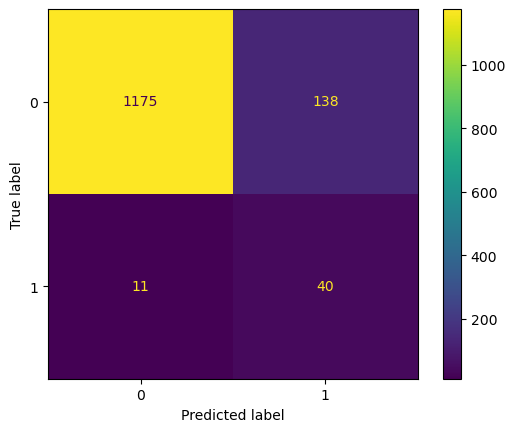

In [19]:
ConfusionMatrixDisplay.from_estimator(model,X_test_select,y_test)

In [20]:
class_report = classification_report(y_test, model.predict(X_test_select))
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.22      0.78      0.35        51

    accuracy                           0.89      1364
   macro avg       0.61      0.84      0.64      1364
weighted avg       0.96      0.89      0.92      1364



In [21]:
importance = model.best_estimator_
importance

RandomForestClassifier(max_depth=5, n_estimators=46, random_state=42)

In [22]:
pickle.dump(importance, open('model_select.pkl', 'wb'))

In [23]:
importances = model.best_estimator_.feature_importances_
importances

array([0.19121941, 0.11660194, 0.17464267, 0.07920059, 0.03949486,
       0.12987288, 0.05745638, 0.05872219, 0.05867434, 0.09411474])

In [24]:
y_testt = pd.DataFrame({' Net Income to Total Assets':[0.944622],
                  ' Borrowing dependency':[0.899194],
                 ' Total income/Total expense':[0.99036],
                 ' Persistent EPS in the Last Four Seasons':[0.98986],
                 ' ROA(A) before interest and % after tax':[0.8978],
                 ' Retained Earnings to Total Assets':[0.808930],
                 ' Liability to Equity':[0.969870],
                 ' Total debt/Total net worth':[0.88765],
                 ' Equity to Liability':[0.745678],
                 ' Pre-tax net Interest Rate':[0.77965]},)

In [25]:
with open('model_select.pkl','rb') as file:
    model_predictor = pickle.load(file)

In [26]:
prediction = model_predictor.predict(y_testt)
prediction

array([0], dtype=int64)